In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

%matplotlib inline

print(torch.__version__)

1.1.0


## Train Manually
線形回帰を例に

In [2]:
# sample data
TRUE_W = 5.0
TRUE_b = 6.0
NUM_DATA = 1000

dtype = torch.float

X = torch.randn(NUM_DATA, dtype=dtype)
noise = torch.randn(NUM_DATA, dtype=dtype)
Y = TRUE_W * X + TRUE_b + noise

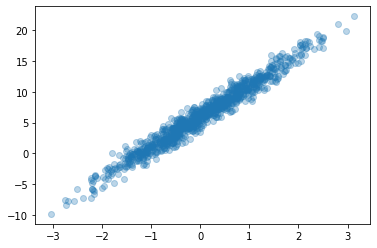

In [3]:
plt.scatter(X.numpy(), Y.numpy(), alpha=0.3);

In [4]:
# Define Model
class Model(object):
    def __init__(self):
        self.W = torch.tensor(1.0, dtype=dtype, requires_grad=True)
        self.b = torch.tensor(1.0, dtype=dtype, requires_grad=True)
        
    def __call__(self, x):
        return self.W * x + self.b
    
# Define loss
def loss(predicted_y, true_y):
    return (predicted_y - true_y).pow(2).mean()

In [5]:
def train_one_epoch(model, inputs, targets, learning_rate):  
    current_loss = loss(model(inputs), targets)
    current_loss.backward()
    
    with torch.no_grad():
        model.W -= learning_rate * model.W.grad
        model.b -= learning_rate * model.b.grad
        model.W.grad.zero_()
        model.b.grad.zero_()

In [6]:
model = Model()

for epoch in range(1, 501):
    train_one_epoch(model, X, Y, 0.005)
    current_loss = loss(model(X), Y).detach().numpy()
    if epoch % 20 == 0:
        print("epoch {}: loss={:.4f}".format(epoch, current_loss))

epoch 20: loss=29.1783
epoch 40: loss=19.6406
epoch 60: loss=13.3306
epoch 80: loss=9.1561
epoch 100: loss=6.3942
epoch 120: loss=4.5670
epoch 140: loss=3.3581
epoch 160: loss=2.5583
epoch 180: loss=2.0291
epoch 200: loss=1.6789
epoch 220: loss=1.4473
epoch 240: loss=1.2940
epoch 260: loss=1.1926
epoch 280: loss=1.1255
epoch 300: loss=1.0811
epoch 320: loss=1.0517
epoch 340: loss=1.0323
epoch 360: loss=1.0194
epoch 380: loss=1.0109
epoch 400: loss=1.0052
epoch 420: loss=1.0015
epoch 440: loss=0.9991
epoch 460: loss=0.9974
epoch 480: loss=0.9963
epoch 500: loss=0.9956


In [7]:
print("W: ", model.W.detach().numpy())
print("b: ", model.b.detach().numpy())

W:  4.987609
b:  6.008927
